# Tracking convective systems over South America in a km-scale WRF simulation

The WRF simulation was run by the South America Affinity Group (SAAG): https://ral.ucar.edu/projects/south-america-affinity-group-saag 

Reference: [Dominguez et al., 2024](https://journals.ametsoc.org/view/journals/bams/105/1/BAMS-D-22-0226.1.xml)

The data spans over 20 years (2000-2020), has a horizontal resolution of 4 km and a temporal resolution of 60 minutes. 

In [1]:
from pathlib import Path 
import xarray as xr 
import numpy as np 
import tobac 
from utils import subset_data, subset_coords

import warnings
warnings.filterwarnings('ignore')
tobac.__version__

'1.5.5'

### Test based on one month of hourly data on native 4km-grid for constrained region over Amazonas river basin

In [2]:
# specify which day and month 
year = '2020'
month = '08'

wrf_output = Path(str('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/'+year+'/'))
monthly_files = list(wrf_output.glob(str('wrf2d*'+year+ '-' + month +'*')))
monthly_files.sort()
print(len(monthly_files), 'files for month ', month)

# get coordinates 
ds_coords = xr.open_dataset( Path('/glade/campaign/univ/uiuc0017/chliu/WRF4KM_2000-2020/wrf2d_wrf3d/wrfconstants_SAAG_20yr.nc')) 
XLAT= ds_coords.XLAT.values.squeeze()
XLONG= ds_coords.XLONG.values.squeeze()

744 files for month  08


In [3]:
latitudes, longitudes = subset_coords(ds_coords, XLAT, XLONG)
print(latitudes.shape, longitudes.shape)

(698, 774) (698, 774)


### Prepare data for tracking for one month 

In [4]:
from tqdm import tqdm 

for fname in tqdm(monthly_files): 
    amazon_region_t = subset_data(fname, XLAT, XLONG)
    if fname == monthly_files[0]:
        monthly_data = amazon_region_t 
    else:
        monthly_data = xr.concat([monthly_data, amazon_region_t], dim = 'Time') 

100%|██████████| 744/744 [15:12<00:00,  1.23s/it]


##### ~ 15 minutes to read and prepare the input data 

In [5]:
print(monthly_data.shape)

(744, 698, 774)


In [8]:
monthly_data

<xarray.DataArray 'IWP' (Time: 744, south_north: 698, west_east: 774)> Size: 2GB
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [6.43375516e-01, 7.06745744e-01, 7.85199821e-01, ...,
         1.93346132e-05, 1.12828085e-08, 7.08240666e-04],
        [7.14655340e-01, 7.69862890e-01, 8.30841362e-01, ...,
         1.25438994e-04, 1.77023907e-07, 2.01995228e-03],
        [8.64245057e-01, 9.37147200e-01, 9.88062203e-01, ...,
         9.21968545e-04, 4.84706688e-04, 1.16818666e-03]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [3.73838004e-04, 2.09349790e-04, 1.81724157e-04, ...,
         6.71301750e-05, 9.27860237e-05, 1.57609640e-04],
        [1.79790775e-03, 7.86814489e-04, 3.77167948e-04, ...,
         4.93846019e-05, 7.26787548e-05, 9.63950224e-05],
        [3.15173832e-03, 3.03275022e-03, 2.75100628e-03, ...,
         3.37108795e-05, 5.78384934e-05, 7.51597981e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [7.46577061e-05, 4.45327241e-05, 3.06658658e-05, ...,
         2.45175179e-05, 6.09824292e-06, 5.39942164e-07],
        [1.31410823e-04, 8.24294402e-05, 4.91181745e-05, ...,
         4.06014587e-05, 1.75707173e-05, 4.46780359e-06],
        [2.21331793e-04, 1.56961716e-04, 9.30207098e-05, ...,
         4.60650626e-05, 2.87913736e-05, 1.12419584e-05]]], dtype=float32)
Coordinates:
    XTIME    (Time) datetime64[ns] 6kB 2020-08-01 ... 2020-08-31T23:00:00
Dimensions without coordinates: Time, south_north, west_east
Attributes:
    FieldType:     104
    MemoryOrder:   XY 
    description:   VERTICALLY INTEGRATED ICE WATER FROM ICE GRAUPEL AND SNOW
    units:         kg m-2
    stagger:       
    cell_methods:  Time: mean

### Have a quick look at the input data 

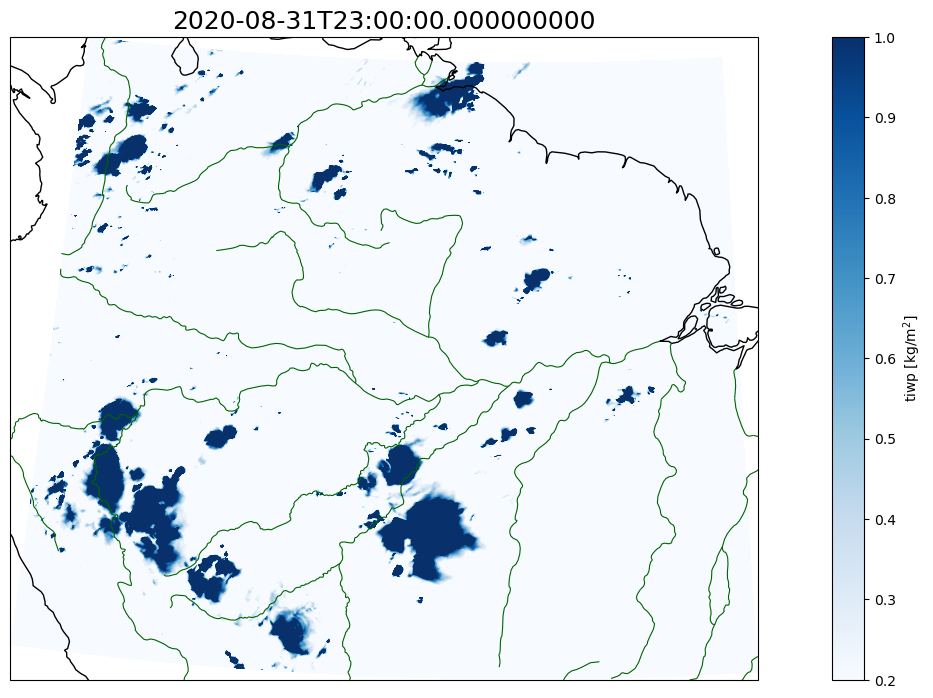

In [16]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.crs as ccrs

# show one hourly timestep of data 
snapshot = amazon_region_t

fig = plt.figure(figsize=(15, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_title(str(amazon_region_t.XTIME.values), fontsize = 18)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.RIVERS, edgecolor='darkgreen', facecolor='none', linewidth=0.8)
iwp_map = ax.pcolormesh(longitudes, latitudes,  snapshot, vmin = 0.2 , vmax = 1.0, cmap = 'Blues' , transform=ccrs.PlateCarree())

plt.tight_layout()
plt.colorbar(iwp_map , label = 'tiwp [kg/m$^2$]')
plt.show()

### Convection tracking for one month

In [ ]:
# time coordinate must contain values in time format
input_data = monthly_data.rename({"XTIME": "time"})
input_data['time']= monthly_data.XTIME.values

In [24]:
print(input_data.dims, input_data.coords) 
print(input_data.shape)

('Time', 'south_north', 'west_east') Coordinates:
    time     (Time) datetime64[ns] 6kB 2020-08-01 ... 2020-08-31T23:00:00
(744, 698, 774)


In [25]:
# 4km, hourly data 
dxy,dt= 4000, 3600

# parameters for feature detection                                                           
parameters_features = {}
parameters_features['threshold']=[0.24] # thresholds for ice water path 
parameters_features['target']='maximum'
parameters_features['n_min_threshold']= 1 # how many grid cells must be contiguous? 
# calculate some bulk statics for the tracked features 
parameters_features['statistic'] = {"feature_min_iwp": np.nanmin, 'feature_max_iwp': np.nanmax, 'feature_mean_iwp': np.nanmean}

# parameters for linking 
parameters_linking={}
parameters_linking['v_max']=1e2
parameters_linking['stubs']= 2 # how many timesteps does the convective have to persist? 
parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['method_linking']= 'predict'

# parameters for segmentation 
parameters_segmentation = {}
parameters_segmentation['threshold']= 0.25 # kg/m2                    
parameters_segmentation['target'] = "maximum"
# calculate some bulk statics for the tracked features 
parameters_segmentation['statistic'] = {"min_iwp": np.nanmin, 'max_iwp': np.nanmax, 'mean_iwp': np.nanmean}

### Run tobac 

Tracking takes another ~ 15 minutes 

In [139]:
from datetime import datetime 

features = tobac.feature_detection_multithreshold(input_data ,dxy, **parameters_features)
tracks = tobac.linking_trackpy(features, input_data, dt, dxy, **parameters_linking)    
tracks = tracks[tracks.cell != -1]
mask, tracks = tobac.segmentation_2D(tracks, input_data, dxy, **parameters_segmentation)

Frame 743: 108 trajectories present.
tracking done 2025-01-20 18:30:12.269237
2025-01-20 18:39:25.364059


### Look at tracking output 

In [ ]:
tracks.head()